In [1]:
import optuna
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from eval_help import *
from combine_results import combine_results

In [2]:
[s.study_name for s in optuna.study.get_all_study_summaries(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db")]

['optimize_counterfactuals_full',
 'optimize_counterfactuals_full_lower_range',
 'optimize_counterfactuals_2',
 'optimize_counterfactuals_vgg_distance',
 'optimize_counterfactuals_vgg_distance_real',
 'optimize_counterfactuals_vgg_distance_final',
 'optimize_counterfactuals_resnet',
 'optimize_counterfactuals_initial',
 'optimize_counterfactuals_initial2',
 'optimize_counterfactuals_vandenhende',
 'optimize_counterfactuals_vandenhende2',
 'optimize_counterfactuals_vandenhende3',
 'optimize_counterfactuals_performance_vgg',
 'optimize_counterfactuals_performance_vgg_2',
 'optimize_counterfactuals_initial3',
 'optimize_counterfactuals_performance_vgg_final']

In [3]:
study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_resnet")

In [4]:
# study = optuna.create_study(
#     storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db",
#     study_name="optimize_counterfactuals_resnet",
#     directions=["maximize", "minimize"],
# )
# study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_resnet")
# study.enqueue_trial(
#     {
#         "lambd2": 10,
#         "max_dist": 0
#     }
# )
# study.enqueue_trial(
#     {
#         "lambd2": 0,
#         "max_dist": 0
#     }
# )

In [5]:
len(study.trials)

413

In [6]:
len([t for t in study.trials if t.values is not None])

402

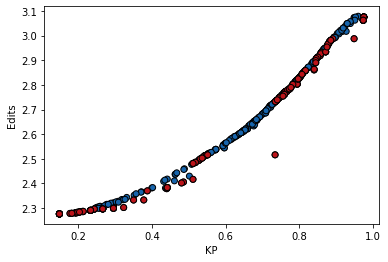

In [7]:
plot_study(study, "resnet", is_resnet=True)

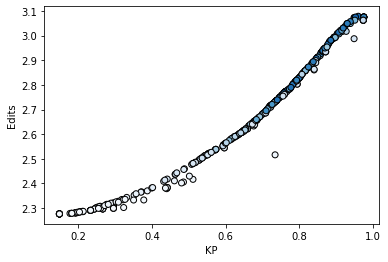

In [8]:
plot_study(study, "resnet_lambd2", print_pareto=False, map=lambda t: t.params["lambd2"] / 10, is_resnet=True)

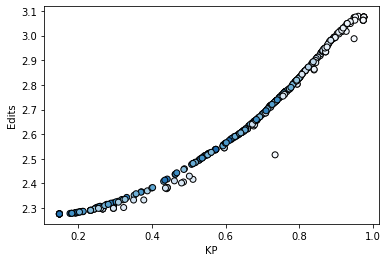

In [9]:
plot_study(study, "resnet_max_dist", print_pareto=False, map=lambda t: t.params["max_dist"] / 3, is_resnet=True)

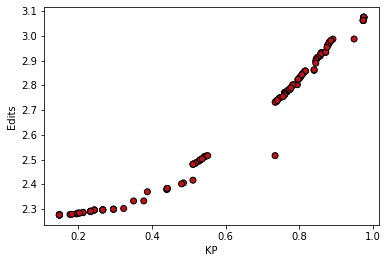

In [10]:
plot_study(study, "resnet_pareto", is_resnet=True, print_others=False)

In [11]:
np.average([t.params["max_dist"] for t in study.best_trials])

1.1410159555394288

In [12]:
optuna.visualization.plot_pareto_front(study, target_names=["KP", "edits"])

In [13]:
optuna.visualization.plot_contour(study, params=["lambd2", "max_dist"], target=lambda t: t.values[0], target_name="KP")

In [14]:
optuna.visualization.plot_contour(study, params=["lambd2", "max_dist"], target=lambda t: t.values[1], target_name="edits")

In [15]:
hyperparams = ["lambd2", "max_dist"]
spearman = study_spearman(study, hyperparams)
pearson, p_pvalue = study_pearson(study, hyperparams)

In [16]:
analyze_spearman(study, hyperparams)

lambd2 correlation is: 0.7744937835912885 on KP, 0.7807178537911876 on edits.
lambd2 pvalue is: 1.437153193099081e-81 on KP, 1.0644674465219087e-83 on edits.
max_dist correlation is: -0.577119484277528 on KP, -0.5628267967772271 on edits.
max_dist pvalue is: 4.504953452628251e-37 on KP, 5.765548737245094e-35 on edits.


In [17]:
analyze_pearson(study, hyperparams)

lambd2 correlation is: 0.7889894088682682 on KP, 0.7331231405608182 on edits.
lambd2 pvalue is: 1.2170810151683e-86 on KP, 5.789015963469264e-69 on edits.
max_dist correlation is: -0.44623871304460916 on KP, -0.5159003599596077 on edits.
max_dist pvalue is: 4.5639858387265535e-21 on KP, 1.0144400243878413e-28 on edits.


In [18]:
results = combine_results("optimize_counterfactuals_resnet")

In [19]:
evaluate_results_spearman(results)

avg_edits Spearman correlation is 1.0, 0.9983635466398939, 0.9975152105964604, 0.9961807842816982, 0.9953662994395636
eval_single_near Spearman correlation is 0.9983635466398939, 1.0, 0.9995097019849891, 0.9994381693516866, 0.9985295238894442
eval_single_same Spearman correlation is 0.9975152105964605, 0.9995097019849891, 0.9999999999999999, 0.9995441534143941, 0.9995937973101532
eval_all_near Spearman correlation is 0.9961807842816981, 0.9994381693516866, 0.9995441534143941, 1.0, 0.9994261172483989
eval_all_same Spearman correlation is 0.9953662994395635, 0.9985295238894442, 0.9995937973101532, 0.9994261172483988, 0.9999999999999999

avg_edits Spearman pvalue is 0.0, 0.0, 0.0, 0.0, 0.0
eval_single_near Spearman pvalue is 0.0, 0.0, 0.0, 0.0, 0.0
eval_single_same Spearman pvalue is 0.0, 0.0, 0.0, 0.0, 0.0
eval_all_near Spearman pvalue is 0.0, 0.0, 0.0, 0.0, 0.0
eval_all_same Spearman pvalue is 0.0, 0.0, 0.0, 0.0, 0.0


In [20]:
evaluate_results_pearson(results)

avg_edits Pearson correlation is 1.0, 0.9330393082951582, 0.9423182844421761, 0.9043472542072167, 0.9203642756761492
eval_single_near Pearson correlation is 0.9330393082951582, 1.0, 0.995951088487076, 0.9934534422143977, 0.9978701130163141
eval_single_same Pearson correlation is 0.9423182844421761, 0.995951088487076, 0.9999999999999999, 0.9813723603235845, 0.9925745861119165
eval_all_near Pearson correlation is 0.9043472542072167, 0.9934534422143977, 0.9813723603235845, 1.0, 0.9969394642611453
eval_all_same Pearson correlation is 0.9203642756761492, 0.9978701130163141, 0.9925745861119165, 0.9969394642611453, 0.9999999999999994

avg_edits Pearson pvalue is 0.0, 1.103320184846575e-179, 3.1478804820446542e-192, 5.40480709610781e-150, 3.426057174301072e-165
eval_single_near Pearson pvalue is 1.103320184846575e-179, 0.0, 0.0, 0.0, 0.0
eval_single_same Pearson pvalue is 3.1478804820446542e-192, 0.0, 0.0, 1.080312026940425e-288, 0.0
eval_all_near Pearson pvalue is 5.40480709610781e-150, 0.0, 

In [21]:
evaluate_results_average(results)

eval_single_near average is 0.8867008054695259
eval_single_same average is 0.6233037179886647
eval_all_near average is 0.8751817618758844
eval_all_same average is 0.6480845113220303
